### Calculation method using connected components + centroids
dark images 
27/8/23

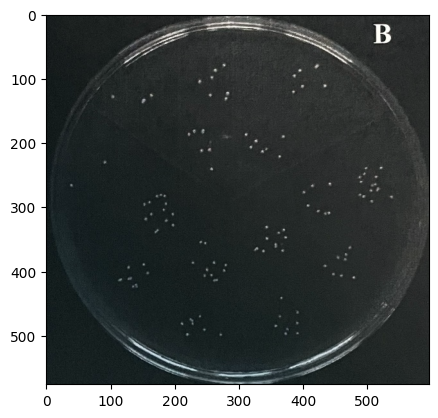

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_dir = "img"
image_name = "bacteria_dark.jpg"
image_name = f"{image_dir}/{image_name}"

image = cv2.imread(image_name)
(width,height,channels) = image.shape
plt.figure()
plt.imshow(image)

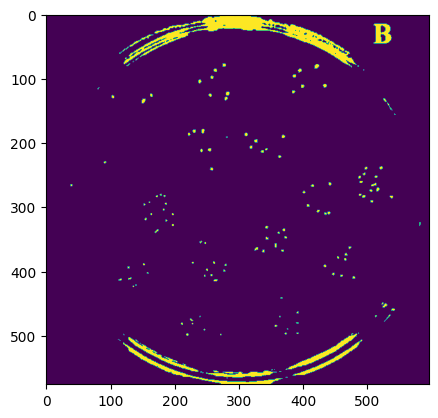

In [8]:
# Apply grayscale, Gaussian Blur, Otsu's threshold
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

plt.figure()
plt.imshow(thresh)

Number of dots found: 174


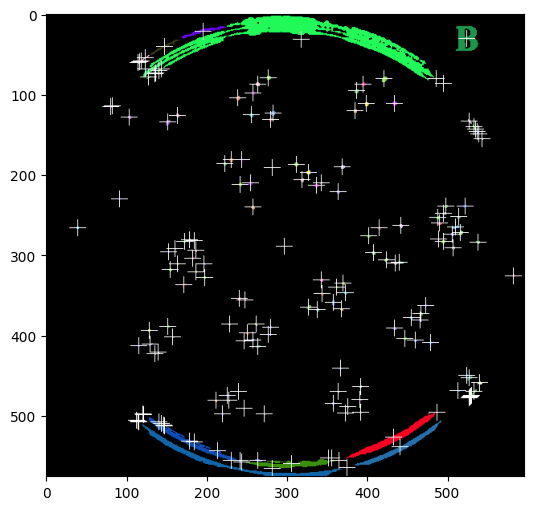

In [9]:
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=4)

# Create false color image and color background black
colors = np.random.randint(0, 255, size=(n_labels, 3), dtype=np.uint8)
colors[0] = [0, 0, 0]  # for cosmetic reason we want the background black
false_colors = colors[labels]

# obtain centroids
false_colors_centroid = false_colors.copy()
for centroid in centroids:
    cv2.drawMarker(false_colors_centroid, (int(centroid[0]), int(centroid[1])),
                   color=(255, 255, 255), markerType=cv2.MARKER_CROSS)

'''''
# Only keep the largest object (area filtering)
MAX_AREA = 100
false_color_centroid_filter = false_colors.copy()
for i, centroid in enumerate(centroids[1:], start=1):
    area = stats[i, 4]
    if area < MAX_AREA:
        cv2.drawMarker(false_color_centroid_filter, (int(centroid[0]), int(centroid[1])),
                       color=(255, 255, 255), markerType=cv2.MARKER_CROSS)
        dish_center = centroid
'''
plt.figure(figsize = (10,6))
plt.imshow(false_colors_centroid)

count = len(centroids)
print(f'Number of dots found: {count}')